In [121]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

In [143]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Week_1\DataFiles\automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [144]:
df.shape

(205, 26)

In [145]:
df.size

5330

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [147]:
#### columns names cleaning :
import janitor
df=df.clean_names()

In [148]:
df=df.replace("?",np.nan)

In [149]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

In [150]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

In [151]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

In [152]:
import klib
klib.corr_interactive_plot(df,figsize=(10,5))

In [153]:
df.isna().sum().sum()

0

In [154]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.tree import export_graphviz,DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_tree,plot_importance,XGBRegressor,XGBRFRegressor
import graphviz
from sklearn.linear_model import LinearRegression,LogisticRegression,SGDRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from lightgbm.sklearn import LGBMRegressor
import warnings                                  
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [155]:
categories_encoder=LabelEncoder()

In [156]:
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])
        

In [157]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,106,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,118,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,91,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,21,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,21,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,21,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470


In [158]:
x=df.drop(["price"],axis=1)
y=df["price"]

In [159]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.25,random_state=41)

In [160]:

models = {
                "Random Forest": RandomForestRegressor(),
                "Decision Tree": DecisionTreeRegressor(),
                "Gradient Boosting": GradientBoostingRegressor(),
                "Linear Regression": LinearRegression(),
                "XGBRFRegressor": XGBRFRegressor(),
                "CatBoosting Regressor": CatBoostRegressor(verbose=False),
                "AdaBoost Regressor": AdaBoostRegressor(),
            }
params={
                "Decision Tree": {
                    'criterion':['poisson', 'squared_error','friedman_mse','absolute_error'],
                    'splitter': ['best', 'random'],
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    "min_samples_split":[2,10,20,30],
                    "min_samples_leaf":[0.1,0.5,0.8],
                    'max_features': [1,2,3,4],
                },
                "Random Forest":{
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    "min_samples_split":[2,10,20,30],
                    "min_samples_leaf":[0.1,0.5,0.8],
                    "bootstrap":[True, False],                                                                                                    
                    "max_features":["sqrt","log2","auto"],                                     
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)],
                    "criterion":['poisson', 'squared_error','friedman_mse','absolute_error']
                },
                "Gradient Boosting":{
                    'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate': [0.0001,0.001,0.01],
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    'subsample': [0.1,0.5,0.8],
                    'criterion':['squared_error', 'friedman_mse'],
                    "min_samples_split":[2,10,20,30],
                    "min_samples_leaf":[0.1,0.5,0.8],
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    'max_features':['auto','sqrt','log2'],
                    
                }, 
                "Linear Regression":{},
                "XGBRFRegressor":{
                    'learning_rate': [0.0001,0.001,0.01], 
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    "max_depth":[int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    'min_child_weight': [int(x) for x in np.linspace(start=1,stop=10,num=1)],
                    'subsample': [0.1,0.5,0.8],
                    'gamma': [0.1,0.5,0.8],
                    'colsample_bytree': [0.1,0.5,0.8], 
                    'colsample_bynode': [0.1,0.5,0.8],
                    'reg_alpha': [0.1,0.5,0.8],
                    'reg_lambda': [0.1,0.5,0.8],
                },
                "CatBoosting Regressor":{
                    'learning_rate': [0.0001,0.001,0.01],
                    'depth': [int(x) for x in np.linspace(start=10,stop=100,num=10)], 
                    'iterations': [int(x) for x in np.linspace(start=50,stop=200,num=10)], 
                    'l2_leaf_reg': [.1,.5,1,1.5,2,3,4,5,5.5],
                    'border_count': [32, 64, 128, 256],
                    'bagging_temperature': [0,0.1,0.5,0.8,1],
                    'random_strength':[0,0.1,0.5,0.8,1]
                },
                "AdaBoost Regressor":{
                    "n_estimators":[int(x) for x in np.linspace(start=100,stop=1000,num=10)], 
                    'learning_rate': [0.0001,0.001,0.01,0.1],
                    'loss':['linear','square','exponential']
                    
                }
                
            }


In [161]:
def evaluate_models(X_train, y_train,X_test,y_test,models,param):
        report = {}

        for i in range(len(list(models))):
            model = list(models.values())[i]
            para=param[list(models.keys())[i]]

            gs = RandomizedSearchCV(model,para,cv=3)
            gs.fit(X_train,y_train)

            model.set_params(**gs.best_params_)
            model.fit(X_train,y_train)

            #model.fit(X_train, y_train)  # Train model

            y_train_pred = model.predict(X_train)

            y_test_pred = model.predict(X_test)

            train_model_score = mean_absolute_percentage_error(y_train, y_train_pred)

            test_model_score = mean_absolute_percentage_error(y_test, y_test_pred)

            report[list(models.keys())[i]] = test_model_score
            

        return report

In [162]:
from tqdm import tqdm

In [163]:
model_report:dict=evaluate_models(xtrain,ytrain,xtest,ytest,models=models,param=params)

In [164]:
model_report

{'Random Forest': 0.1888289332137772,
 'Decision Tree': 0.22035342344275663,
 'Gradient Boosting': 0.2994239972334432,
 'Linear Regression': 0.2175521138508594,
 'XGBRFRegressor': 0.9894738475543178,
 'CatBoosting Regressor': 0.41513292959439657,
 'AdaBoost Regressor': 0.17262034967847592}

In [165]:
result_data=pd.DataFrame(model_report.values(),index=model_report.keys()).reset_index().rename(columns={"index":"Model",0:"mape"})
result_data.sort_values(by="mape")

,Model,mape
6,AdaBoost Regressor,0.172620
0,Random Forest,0.188829
3,Linear Regression,0.217552
1,Decision Tree,0.220353
2,Gradient Boosting,0.299424
5,CatBoosting Regressor,0.415133
4,XGBRFRegressor,0.989474


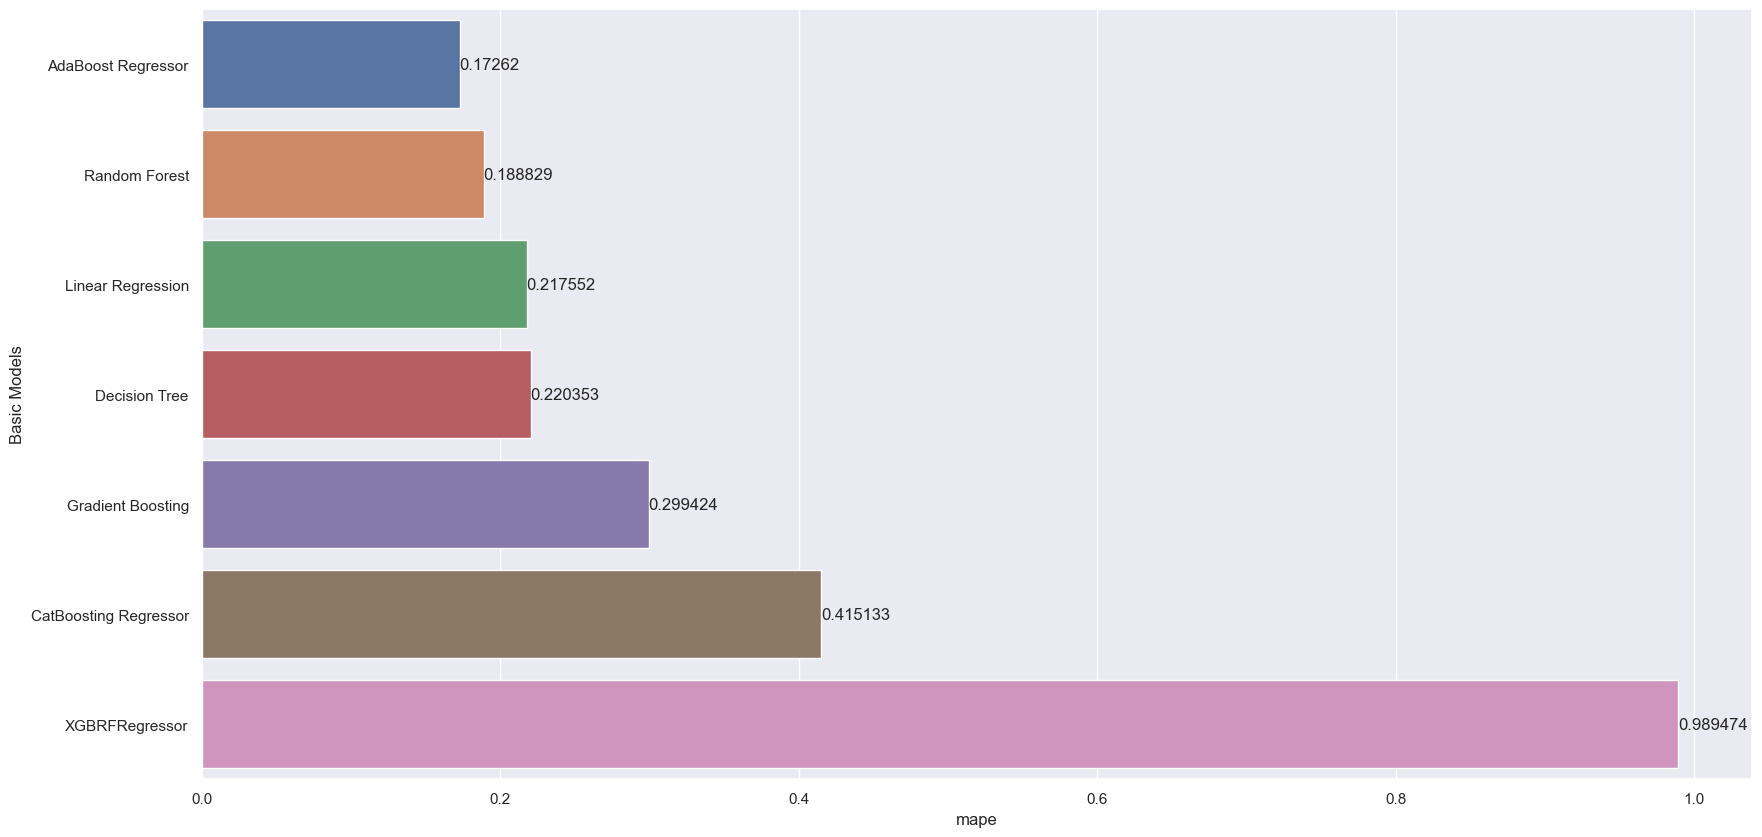

In [178]:
ax=sns.barplot(data=result_data,x="mape",y="Model",order=result_data.sort_values(by="mape").Model)
ax.set_ylabel("Basic Models")
for label in ax.containers:
    ax.bar_label(label)

In [166]:
best_model_score = min(sorted(model_report.values()))
best_model_score

0.17262034967847592

In [167]:
best_model_name = list(model_report.keys())[
                list(model_report.values()).index(best_model_score)]
best_model_name

'AdaBoost Regressor'

In [168]:
best_model = models[best_model_name]
best_model

AdaBoostRegressor(learning_rate=0.001, n_estimators=100)

In [169]:
predicted=best_model.predict(xtest)

In [170]:
predicted[0:5]

array([ 7509.83823529, 10155.44      , 15217.88709677, 18911.72727273,
       30747.2       ])

In [171]:
r2_square = mean_absolute_percentage_error(ytest, predicted)
r2_square

0.17262034967847592

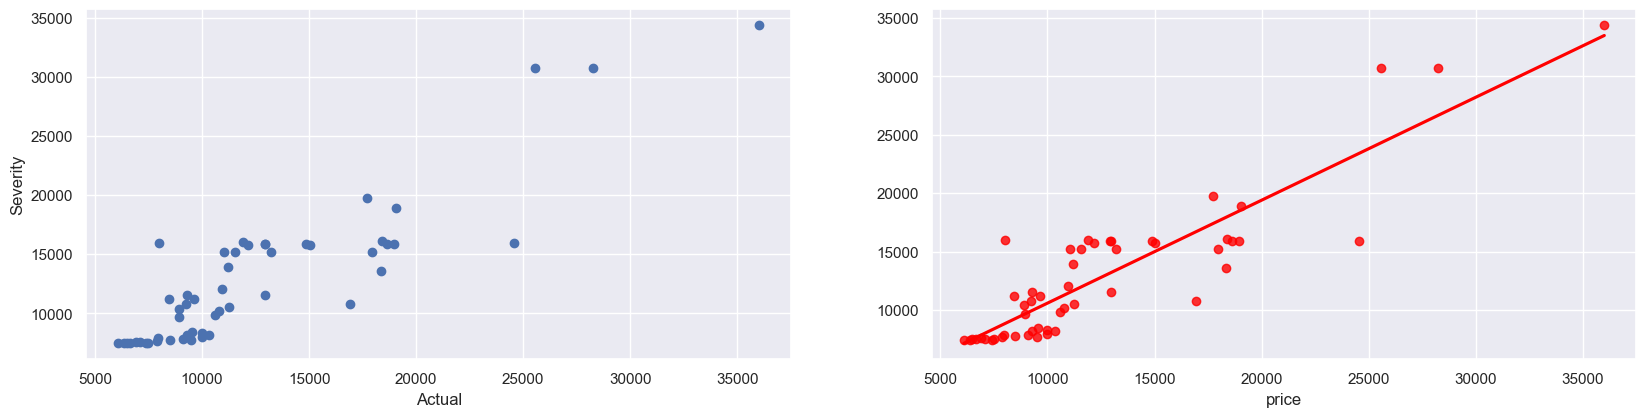

In [179]:
plt.subplot(221)
plt.scatter(ytest,predicted);

plt.xlabel('Actual');
plt.ylabel('Severity');

plt.subplot(222)
sns.regplot(x=ytest,y=predicted,ci=None,color ='red');